<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Алексей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [1]:
! pip install -q jupyternotify

In [2]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
# Время обучения модели
import timeit
from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
# Применим кроссвалидацию для повышения качеств обучения
# Для константной модели
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error,
    mean_absolute_error,
    fbeta_score, 
    make_scorer
)

# Контроль выборки
from sklearn.utils import shuffle

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='orange'> Неужели всё это понадобится в проекте? Лишние импорты лучше удалить, ведь это ненужные зависимости.</font>

<font color='purple'><b>Комментарий студента</b> Да, действительно оставил ненужные, но я это не случайно оставил, чтобы в ходе отладки не пришлось снова возвращаться здесь подключать другие библиотеки. Я это разместил как шаблон подключения всех библиотек, после принятия проекта я уберу лишние библиотеки </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Загрузим данные

In [4]:
# Получаем датасет
try:
    # С локального файла
    try:
        df = pd.read_csv('autos.csv')
    except:
        df = pd.read_csv('/datasets/autos.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

### Изучим данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

**Дополнительные информация:**

**Признаки**
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `Repaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

**Целевой признак**
- `Price` — цена (евро)

In [6]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Тут можно заметить странное, что в колонке "год регистрации автомобиля" есть 1000 и 9999. Скорее всего это аномальное значения. Также в данный момент не существуют машин, у которых мощностей двигателя больше 143 л.с. А также странно получилось, что машина выставлена в продажах бесплатно. Ну, может быть они хотят быстрее избавиться от них, а может "ради прикола" выставили в продажах, но все равно устраняем их

Text(0, 0.5, 'Стоимость ЕВРО')

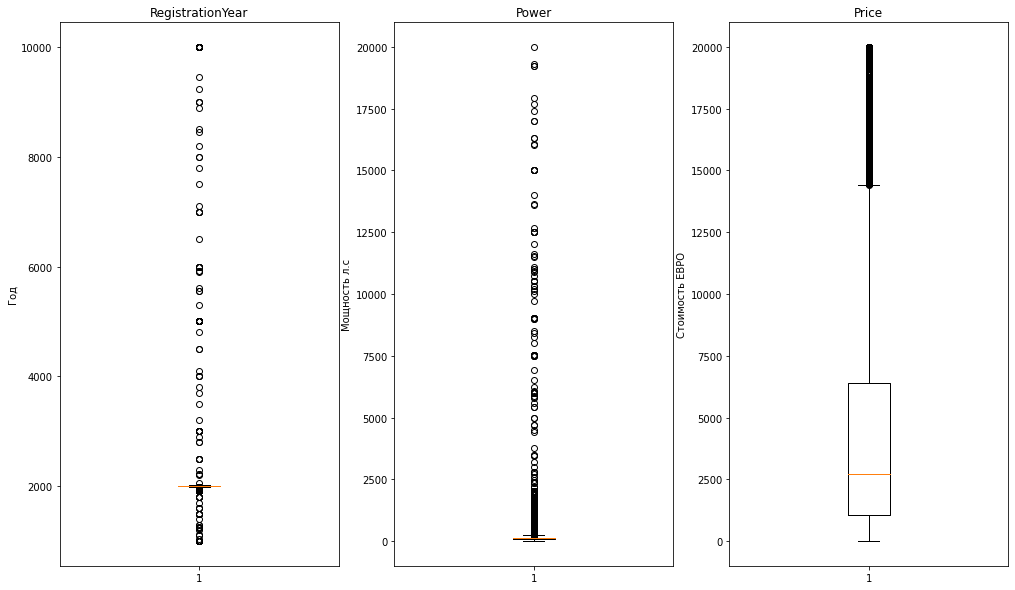

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Заполним пропущенные значения и обработаем аномалии в столбцах. Если среди признаков имеются неинформативные, то удалим их.

In [9]:
# Скорпируем
df_clean = df.copy()

Удаляем аномальные значения

In [10]:
# Смотрим дату скачивания анкеты из базы и год регистрации автомобиля, 
# т.к. год регистрации автомобиля не должен позже дату скачивания анкеты
df_clean['DateCrawled'].max()

'2016-04-07 14:36:58'

In [11]:
# Очистим
# Год регистрации автомобиля
df_clean = df_clean[df_clean['RegistrationYear'] > (df_clean.describe()['RegistrationYear']['50%'] - df_clean.describe()['RegistrationYear']['std'])]
df_clean = df_clean[df_clean['RegistrationYear'] < 2017]

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Обрати внимание на даты в DateCrawled в сравнении с RegistrationYear</font>

<font color='purple'><b>Комментарий студента</b> А да, не заметил, хорошо спрятано) </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [12]:
# Мощность двигателя л.с
df_clean = df_clean[df_clean['Power'] > 5]

# В 2016 году шведский суперкар с названием Koenigsegg Regera имеет 1800 л.с. и двигатель у него является самым мощным в мире
df_clean = df_clean[df_clean['Power'] < 1800]

In [13]:
# Бесплатных автомобилей устраняем 
df_clean = df_clean[df_clean['Price'] > 1]

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Выбросить машину в Германии удовольствие не из дешёвых, я бы не считал дешёвые машины аномалией ))</font>

<font color='purple'><b>Комментарий студента</b> Ну ладно, оставим тачку со стоимостью больше одного евро, может кому то повезет успеть первым ухватиться БМВ 7er со стоимостью 2 евро)) Мечтать не вредно </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [14]:
df_clean[df_clean.index==3742]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3742,2016-03-23 17:30:02,2,sedan,2002,auto,272,7er,5000,9,petrol,bmw,NaN,2016-03-23 00:00:00,0,65183,2016-03-24 21:28:34


In [15]:
df_clean.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,295937.000000,295937.000000,295937.000000,295937.000000,295937.000000,295937.0,295937.000000
mean,4865.070944,2002.823043,121.330158,128300.280127,5.996080,0.0,51241.180390
std,4611.936652,6.536964,60.845880,36737.164496,3.582654,0.0,25782.523619
min,2.000000,1923.000000,6.000000,5000.000000,0.000000,0.0,1067.000000
25%,1350.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30926.000000
50%,3200.000000,2003.000000,111.000000,150000.000000,6.000000,0.0,50259.000000
75%,6999.000000,2007.000000,150.000000,150000.000000,9.000000,0.0,72108.000000
max,20000.000000,2016.000000,1799.000000,150000.000000,12.000000,0.0,99998.000000


Text(0, 0.5, 'Стоимость ЕВРО')

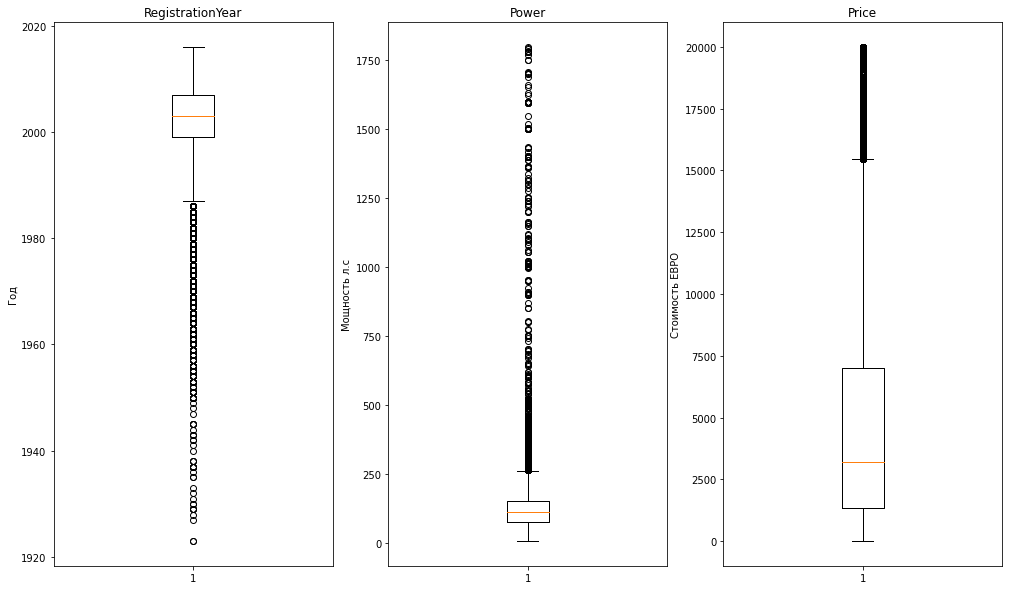

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17, 10))

axs[0].boxplot(df_clean['RegistrationYear'])
axs[0].set_title('RegistrationYear')
axs[0].set_ylabel('Год')
        
axs[1].boxplot(df_clean['Power'])
axs[1].set_title('Power')
axs[1].set_ylabel('Мощность л.с')

axs[2].boxplot(df_clean['Price'])
axs[2].set_title('Price')
axs[2].set_ylabel('Стоимость ЕВРО')

In [17]:
# Преобразуем на другой тип данных DateCrawled, DateCreated и LastSeen
df_clean['DateCrawled'] = pd.to_datetime(df_clean['DateCrawled'])
df_clean['DateCreated'] = pd.to_datetime(df_clean['DateCreated'])
df_clean['LastSeen'] = pd.to_datetime(df_clean['LastSeen'])

In [18]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.489026974707155%'

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно оставить хотя бы 70 % данных.</s></font>

<font color='purple'><b>Комментарий студента</b> Потеря не велика. Теперь приступаем дальше</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

#### Пропущенные значения

Устранили аномальные значения, теперь смотрим кол-во пропущенных значений. 

Будем устранять аномальные значения заполнением `"unknown"` или медиальным значением, т.к. радикальным методом не получится, т.к. будет большая потеря данных, что и приведет к `invalid` данным, т.к. данные должны сохранять 70% от исходного после переработки, смотрим.

In [19]:
df_clean.isna().sum()

DateCrawled              0
Price                    0
VehicleType          10926
RegistrationYear         0
Gearbox               5336
Power                    0
Model                11014
Kilometer                0
RegistrationMonth        0
FuelType             15455
Brand                    0
Repaired             42742
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [20]:
len(df_clean)

295937

##### Радикальный метод

In [21]:
# Скорпируем
df_clean_rad = df_clean.copy()

In [22]:
# Устраняем
df_clean_rad = df_clean_rad[~df_clean_rad['VehicleType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Gearbox'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Model'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['FuelType'].isna()]
df_clean_rad = df_clean_rad[~df_clean_rad['Repaired'].isna()]

In [23]:
f'Потеряно {100 * (1 - df_clean_rad.shape[0] / df_clean.shape[0])}%'

'Потеряно 21.300817403704166%'

Потеря составляет 21% от датафрейма df_clean, но не стоит забывать, что датафрейм также претерпевал потерю около 17% от исходного датафрейма, значит, потеря составляет свыше 30%. А нам хотя бы сохранить не менее 70% от исходных данных

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Слишком большая потеря данных. Тесты будут невалидными.</s></font>

<font color='purple'><b>Комментарий студента</b> Подправил, исправил. Но у меня вопрос, 33% потеря, но не так сильно по сравнению предующего? Можно ли дальше провести исследование с этим датафреймом? </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>На это сможет ответить только честная тестовая выборка отложенная в самом начале, до препроцессинга. ))\
Чем больше мы вносим изменений в данные, тем больше они отклоняются от того с чем модели придётся работать в будущем. Это надо всегда иметь ввиду.</font>

##### Второй способ - заполнение `"unknown"` или медианным значением 

In [24]:
# Заполним значением "unknown"
df_clean['VehicleType'] = df_clean['VehicleType'].fillna('unknown')
df_clean['Gearbox'] = df_clean['Gearbox'].fillna('unknown')
df_clean['Model'] = df_clean['Model'].fillna('unknown')
df_clean['FuelType'] = df_clean['FuelType'].fillna('unknown')
df_clean['Repaired'] = df_clean['Repaired'].fillna('unknown')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены достаточно безопасно.
</font>

In [25]:
# Проверим
df_clean.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [26]:
df_clean.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07


In [27]:
len(df_clean)

295937

#### Уникальные значения 

С столбцом `RegistrationMonth` что то неладное, смотрим

In [28]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Как оказывается, что существует одна лишняя цифра

In [29]:
df_clean['RegistrationMonth'].value_counts().sort_values()

0     17814
2     18856
8     19722
1     20187
9     20953
11    21050
12    21206
10    22962
7     23837
5     25619
4     25753
6     27556
3     30422
Name: RegistrationMonth, dtype: int64

Смотрим кол-во, чтобы понять, что с ними делать - удалить или усреднять

In [30]:
df_clean[df_clean['RegistrationMonth'] == 0]['RegistrationMonth'].count()

17814

In [31]:
df_clean[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'].count()

21206

Кол-во приближенное одинаково, поэтому не можем устранять их, усредняем

In [32]:
df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6

/tmp/ipykernel_48/2917873319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['RegistrationMonth'] == 12]['RegistrationMonth'] = 6


In [33]:
df_clean['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Теперь с данными в порядке, можно уже приступать к обучению моделей

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>  Обрати внимание на уникальные значения в "registration_month"</font>

<font color='purple'><b>Комментарий студента</b> Подправил, исправил </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

#### Дублирующие значения

In [34]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

4

In [35]:
# Избавимся от них
df_clean.drop_duplicates(inplace=True)

In [36]:
# Кол-во дублириющие значения
df_clean.duplicated().sum()

0

In [37]:
f'Потеряно {100 * (1 - df_clean.shape[0] / df.shape[0])}%'

'Потеряно 16.490155741613965%'

Теперь приступаем к обучению модели

## Обучение моделей

Перед обучением нужно сделать следующие: прямое кодирование, порядкое кодирование и масштабируемость модели. Поэтому обучение моделей будет разделен на 3 этапа: OH, OHE, SCALER. А также обучение будет проводиться кроссвалидацией

Поскольку у нас присутствуют некоторые признаки, которые являются строковыми или ojbect типами, а для машинного обучения регрессионного типа требует числа. Поэтому примением кодировку, которая будет преобразовать в числа

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

Как и видим, что существуют несколько признаков, имеющих типа object. Теперь создадим список, который автоматически заполняет определенный тип

In [39]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

**Категориальные признаки**

In [40]:
col_type_obj = df_clean.select_dtypes(include='object').columns.to_list()
print('Список категориальных признаков:', col_type_obj)

Список категориальных признаков: ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']


**Численные признаки**

In [41]:
col_type_num = df_clean.select_dtypes(exclude='object').columns.to_list()
for i in ['DateCrawled', 'Price', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen']:
    col_type_num.remove(i)
print('Список численных признаков:', col_type_num)

Список численных признаков: ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']


<font color='purple'><b>Комментарий студента</b> Позаимствовал идею с ссылки, что ты прислал. Удобная штука </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Прямое кодирование - One-Hot Encoding

_**Памятка себе:**_

**Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding).**

**OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).**

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295933 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        295933 non-null  datetime64[ns]
 1   Price              295933 non-null  int64         
 2   VehicleType        295933 non-null  object        
 3   RegistrationYear   295933 non-null  int64         
 4   Gearbox            295933 non-null  object        
 5   Power              295933 non-null  int64         
 6   Model              295933 non-null  object        
 7   Kilometer          295933 non-null  int64         
 8   RegistrationMonth  295933 non-null  int64         
 9   FuelType           295933 non-null  object        
 10  Brand              295933 non-null  object        
 11  Repaired           295933 non-null  object        
 12  DateCreated        295933 non-null  datetime64[ns]
 13  NumberOfPictures   295933 non-null  int64   

In [43]:
# Убираем лишние признаки перед прямым кодированием
df_ohe = df_clean[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 
                   'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired']]

In [44]:
# Смотирм
df_ohe.duplicated().sum()

23102

In [45]:
# Избавимся от них
df_ohe.drop_duplicates(inplace=True)

/tmp/ipykernel_48/173871514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohe.drop_duplicates(inplace=True)


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Здесь хорошо бы посмотреть дубликаты.</font>

<font color='purple'><b>Комментарий студента</b> Откуда они появились, я вроде же прочистил перед обучением</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍Отличия были в признаках которые исключили из данных.</font>

#### Деление на обучающей и валидационной выборки

In [46]:
# Получаем признак и цель 
features = df_ohe.drop('Price', axis=1)
target = df_ohe['Price']

In [47]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

In [445]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Хороший инструмент для быстрого анализа, но для новых данных если набор категорий будет отличаться, получить данные с такой-же размерностью будет нельзя. Для возможности работы модели с новыми данными нужен OneHotEncoder.</font>

<font color='purple'><b>Комментарий студента</b> Подправил </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [447]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [448]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame

In [449]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [450]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [451]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Отлично, что OHE был обучен только на тренировочной части данных!</font>

#### LinearRegression

In [452]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [454]:
%%notify -m "LinearRegression OHE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 2678.2658313392585
TIME TRAIN [s]: 3.15
CPU times: total: 20.1 s
Wall time: 17.2 s


<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признков соответсвует модели!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Классно , что применена кроссвалидация!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Время обучения модели нужно измерить без подбора гиперпараметров и кроссвалидации. Сетка параметров у моделей разная и сравнивать время их перебора некорректно.</s></font>

<font color='blue'><b>Комментарий ревьюера : </b></font>\
<font color='blue'>Время обучения модели с лучшими параметрами на всех данных (в конце подбора) можно вытащить как  `model.refit_time_`</font>

**Проверка на тестовой выборки**

In [455]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

# Узнаем RMSE
result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2693.317059048769
Предсказание: 4844.076333852994
CPU times: total: 234 ms
Wall time: 248 ms


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Тестирование должно заканчиваться расчётом метрики RMSE между предсказанием и тестовым таргетом!</s> </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> RMSE можно получить передав параметр `squared= False` в `mean_squared_error`</font>

<font color='purple'><b>Комментарий студента 2</b> Подправил </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Отлично! У нас есть Метрика качества модели на тестовых данных и время предсказания модели!\
Но выбирать Лучшую модель нужно по RMSE полученной при кроссвалидации.</font>

In [456]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LinearRegression_OHE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': model.refit_time_, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': model.best_params_
})

results[count_model]
count_model+=1

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Подбор гиперпараметров проведён верно!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding). OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).</s></font>

<font color='purple'><b>Комментарий студента</b> Понял, принял. Уберу их </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='blue'> Бустеры - это тоже деревья. Об эффекте на них OHE можно судить по времени обучения и работы этих моделей,  </font>

<font color='purple'><b>Комментарий студента 2</b> Ок, уберу их </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='blue'>В общем, не плохо, что ты проводишь эксперименты работы разных моделей с разным типом предобработки, но некоторые комбинации явно не сработают лучшим образом, это понятно из из самой структуры данных и моделей которые к ним применяются. Поэтому проверка таких сочетаний только утяжеляет исследование и занимает лишнее время.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>CatBoost может сам кодировать категории из типа данных 'object' и 'category', но эта кодровка занимает дополнительное время. Если кодировать OE, то получатся быстрее.</font>

<font color='purple'><b>Комментарий студента</b> Понял, учту в будущем </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Порядковое кодирование - OrdinalEncoder

#### Кодирование признаков - деление на обучающей и валидационной выборки

Теперь преобразуем в другой тип, применяя OrdinalEncoder

In [56]:
# Убираем лишние признаки перед прямым кодированием
df_clean = df_clean[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 
                   'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired']]

In [57]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [58]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [59]:
Encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [60]:
# Обучающие признаки обучим и трансформируем 
features_train[col_type_obj] = Encoder.fit_transform(features_train[col_type_obj])

/tmp/ipykernel_48/3211150383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[col_type_obj] = Encoder.fit_transform(features_train[col_type_obj])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [61]:
# Валидациоaнные признаки только трансформируем
features_valid[col_type_obj] = Encoder.transform(features_valid[col_type_obj])

/tmp/ipykernel_48/1763516014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[col_type_obj] = Encoder.transform(features_valid[col_type_obj])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Энкодер можно обучать только на обучающих данных.\
Валидационную и тестовую выборки только трансформируем.\
Что бы не возникало ошибок с неизвесными категориями, нужно использовать параметры энкодера: `handle_unknown`, `unknown_value` или `encoded_missing_value`</s></font>

<font color='purple'><b>Комментарий студента</b> Подправил. А почему именно валидационную и тестовкую выборку только трансформируем, это как то влияет? </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='blue'>Во первых, Энкодер при обучении берёт весь набор уникальных значений в колонке категорий и присваивает каждому значению уникальный номер. Но в тестовой и валидационной выборке может не быть каких то категорий и тогда при обучении нумерация будет другая, номер категории в обучающей выборке будет отличаться от номера в тестовой.\
Во вторых, при работе моделей данные могут приходить по одной строке, где будет один вариант категории в каждом признаке. Для работы с такими данными нужен обученный Энкодер (на обучающих данных), который "помнит" какой номер какому слову был присвоен при обучении модели, то есть словарь с человеческого в модельный )). </font>

In [62]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 10)
(118374, 10)


In [63]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [64]:
display(features_train.head(3))

display(features_valid.head(3))

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
131749,5.0,1996,1.0,54,75.0,150000,5,7.0,27.0,0.0
279442,4.0,2000,1.0,75,116.0,125000,9,6.0,38.0,0.0
166435,8.0,2000,1.0,107,136.0,150000,9,6.0,27.0,0.0


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
193124,5.0,2002,1.0,60,102.0,90000,3,6.0,10.0,0.0
2170,8.0,2005,1.0,135,198.0,125000,5,6.0,27.0,0.0
235550,5.0,2009,1.0,60,101.0,150000,3,6.0,31.0,2.0


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Энкодер (как и Скалер) нельзя обучать на полных данных.\
Для вычисления трансформаций они используют информацию о всех поданных в них данных и обучение на полных данных приводит к утечке из обучающей выборки во все остальные. Тестовые и валидационные выборки можно только трансформировать, предобработчиками обученными на train.</s></font>

<font color='purple'><b>Комментарий студента</b> Подправил. Но разве для обучения нужны еще другие признаки, чтобы повысить эффективность (находить закономерность и связи), а тут получается, что мы убрали их и оставили лишь шесть признаков </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> Количественные признаки конечно нужны их нужно сохранить для модели.\
Сделать это можно присоединив срез количественных признаков к закодированным данным,\
или кодируя только нужные признаки.\
`X_test[cat_list] = encoder.transform(X_test[cat_list])`</font>

Теперь создадим датасет, в котором содержатся исключительно цифры

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Линейные модели требуют OHE кодировки категорий.</s></font>

<font color='purple'><b>Комментарий студента</b> Убрал, т.к. предыдующая ошибка учла </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**Проверка на тестовой выборки**

#### DecisionTreeRegressor

In [65]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 101, 10), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [66]:
%%notify -m "DecisionTreeRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 1946.6320820939814
TIME TRAIN [s]: 0.41
CPU times: user 54.4 s, sys: 183 ms, total: 54.5 s
Wall time: 54.8 s


<IPython.core.display.Javascript object>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признков соответсвует модели!</font>

**Проверка на тестовой выборки**

In [67]:
# Инициализируем модель c лучшими гиперпараметрами
model = DecisionTreeRegressor(random_state = 12345).set_params(max_depth = params['max_depth'], min_samples_leaf = params['min_samples_leaf'])

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=2, random_state=12345)

In [68]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)

print('Предсказание:', predictions.mean())

RMSE VALID: 1911.4296286479232
Предсказание: 4855.465560115789
CPU times: user 23.2 ms, sys: 89 µs, total: 23.3 ms
Wall time: 21.2 ms


In [69]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'DecisionTreeRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': round(time, 2), 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### RandomForestRegressor

In [70]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [71]:
%%notify -m "RandomForestRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 1635.4065969530275
TIME TRAIN [s]: 7.07
CPU times: user 3min 30s, sys: 617 ms, total: 3min 31s
Wall time: 3min 31s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [72]:
# Инициализируем модель c лучшими гиперпараметрами
model = RandomForestRegressor(random_state = 12345).set_params(
    max_depth = params['max_depth'], 
    max_features = params['max_features'], 
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=50,
                      random_state=12345)

In [73]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 1606.6479762704178
Предсказание: 4854.598314764133
CPU times: user 1.07 s, sys: 16 ms, total: 1.08 s
Wall time: 1.09 s


In [74]:
results[count_model] = pd.Series({
    'NAME': 'RandomForestRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### LightGBMRegressor

In [75]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [76]:
%%notify -m "LightGBMRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 1887.95083563258
TIME TRAIN [s]: 1.0
CPU times: user 1min 30s, sys: 1.57 s, total: 1min 31s
Wall time: 1min 32s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [77]:
# Инициализируем модель c лучшими гиперпараметрами
model = LGBMRegressor().set_params(
    max_depth = params['max_depth'], 
    num_leaves = params['num_leaves'], 
    learning_rate = params['learning_rate'],
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=25, num_leaves=10)

In [78]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 1858.723461074672
Предсказание: 4861.046970265422
CPU times: user 184 ms, sys: 7.77 ms, total: 192 ms
Wall time: 197 ms


In [79]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LightGBMRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

#### CatBoostRegressor

In [80]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [81]:
%%notify -m "CatBoostRegressor OE"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

0:	learn: 4595.6975750	total: 70.2ms	remaining: 631ms
1:	learn: 4565.0904929	total: 89.3ms	remaining: 357ms
2:	learn: 4534.9589066	total: 108ms	remaining: 253ms
3:	learn: 4505.2428554	total: 128ms	remaining: 191ms
4:	learn: 4475.7557038	total: 147ms	remaining: 147ms
5:	learn: 4446.9740799	total: 165ms	remaining: 110ms
6:	learn: 4418.6968903	total: 183ms	remaining: 78.6ms
7:	learn: 4391.0918699	total: 203ms	remaining: 50.7ms
8:	learn: 4363.5150246	total: 222ms	remaining: 24.6ms
9:	learn: 4335.8113842	total: 240ms	remaining: 0us
0:	learn: 4587.1013079	total: 19.2ms	remaining: 173ms
1:	learn: 4556.5692240	total: 38.4ms	remaining: 154ms
2:	learn: 4526.8269200	total: 57.4ms	remaining: 134ms
3:	learn: 4496.9895735	total: 76.8ms	remaining: 115ms
4:	learn: 4467.5828003	total: 96.2ms	remaining: 96.2ms
5:	learn: 4439.0487143	total: 116ms	remaining: 77.1ms
6:	learn: 4410.6546440	total: 135ms	remaining: 57.7ms
7:	learn: 4383.0422919	total: 154ms	remaining: 38.4ms
8:	learn: 4355.8783718	total: 172m

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [82]:
# Инициализируем модель c лучшими гиперпараметрами
model = CatBoostRegressor().set_params(
    depth = params['depth'], 
    learning_rate = params['learning_rate'], 
    iterations = params['iterations']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

0:	learn: 4292.6884486	total: 61.8ms	remaining: 1.17s
1:	learn: 3998.4492194	total: 125ms	remaining: 1.12s
2:	learn: 3743.1994915	total: 183ms	remaining: 1.04s
3:	learn: 3514.3690218	total: 248ms	remaining: 993ms
4:	learn: 3310.7681710	total: 309ms	remaining: 927ms
5:	learn: 3134.7327419	total: 369ms	remaining: 862ms
6:	learn: 2976.6019672	total: 420ms	remaining: 780ms
7:	learn: 2841.7769690	total: 469ms	remaining: 704ms
8:	learn: 2723.1084031	total: 521ms	remaining: 637ms
9:	learn: 2621.5374083	total: 570ms	remaining: 570ms
10:	learn: 2527.2522847	total: 619ms	remaining: 507ms
11:	learn: 2446.0472900	total: 669ms	remaining: 446ms
12:	learn: 2379.0186817	total: 718ms	remaining: 387ms
13:	learn: 2314.4885843	total: 769ms	remaining: 330ms
14:	learn: 2259.8224623	total: 819ms	remaining: 273ms
15:	learn: 2214.3353087	total: 868ms	remaining: 217ms
16:	learn: 2171.7500251	total: 916ms	remaining: 162ms
17:	learn: 2135.1566625	total: 965ms	remaining: 107ms
18:	learn: 2100.0875746	total: 1.01s	

In [83]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2058.2621331876317
Предсказание: 4856.60198898797
CPU times: user 21.1 ms, sys: 11 µs, total: 21.1 ms
Wall time: 20 ms


In [84]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'CatBoostRegressor_OE', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

### Масштабирование признаков - StandardScaler

#### Масштабируем One-Hot Encoding

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Для каких моделей нужна Стандартизация?</font>

<font color='purple'><b>Комментарий студента 2</b> Для любых моделей подойдет, которая является регрессией, т.е. применяется только числовыми признаками. Ну, допустим, например, для линейной регрессии подойдет и еще можно дерево решений и.т.д. </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ⚠️\
<font color='darkorange'> Для деревьев стандартизация точно не важна, поскольку разбиения всегдаа идут по одному конкретному признаку и масштаб соседних признаков никак на это не влияет.\
Но на самом деле на простой линейной регрессии стандартизация также не окажет никакого влияния, поскольку все изменения переменной можно нивелировать за счет изменения коэффициента:

$y = \alpha + \beta X$ - без стандартизации

$y = \alpha_{st} + \beta_{st} \frac{X-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) X$ - со стандартизацией

При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$.

По ссылкам можно узнать, когда все-таки стандартизация крайне важна: <a href = 'https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html'>тут</a> и <a href = 'https://www.statlect.com/fundamentals-of-statistics/linear-regression-with-standardized-variables'>тут</a>.</font>

##### Деление на обучающей и валидационной выборки

In [400]:
features = df_ohe.drop(['Price'], axis=1)
target = df_ohe['Price']

In [401]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

In [402]:
# Кодируем
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

<font color='purple'><b>Комментарий студента</b> Подправил </font>

In [403]:
# Обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[col_type_obj])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [404]:
# Добавляем закодированные признаки в X_train_ohe
# Encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])

C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2474216900.py:3: PerformanceWarning: DataFrame

In [405]:
# Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[col_type_obj])
C:\Users\Papin\AppData\Local\Temp\ipykernel_32128\2424170447.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [406]:
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(col_type_obj, axis=1)

features_valid = features_valid.drop(col_type_obj, axis=1)

In [407]:
display(features_train.head())
display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,2007,131,125000,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,1997,75,100000,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,1997,130,150000,3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,2009,143,60000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,2006,170,150000,12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,2001,44,150000,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,2007,105,150000,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,2000,179,150000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,1997,231,150000,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,2008,71,50000,9,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [408]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler = StandardScaler()

In [409]:
# Преобразуем обучающую, валидационную и тестовую выборки функцией transform(), т.е.
# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[col_type_num] = scaler.fit_transform(features_train[col_type_num])
features_valid[col_type_num] = scaler.fit_transform(features_valid[col_type_num])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

In [410]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(163698, 310)
(109133, 310)


In [411]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [412]:
display(features_train.head())

display(features_valid.head())

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
184019,0.639959,0.160845,-0.090133,0.005881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224508,-0.882114,-0.762130,-0.770483,0.840874,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328264,-0.882114,0.144363,0.590217,-0.829112,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136227,0.944374,0.358625,-1.859043,-0.829112,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309930,0.487752,0.803631,0.590217,1.675868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,Repaired_unknown,Repaired_yes
110198,-0.265106,-1.244210,0.591269,-0.269498,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96619,0.639549,-0.261018,0.591269,-0.827991,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
345457,-0.415881,0.931706,0.591269,-1.665730,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142762,-0.868209,1.769837,0.591269,-0.827991,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221541,0.790325,-0.809027,-2.121061,0.847488,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### LinearRegression

In [413]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [414]:
%%notify -m "LinearRegression OHE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 2678.2658313390552
TIME TRAIN [s]: 3.42
CPU times: total: 22.7 s
Wall time: 18.6 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [415]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2692.6928922932516
Предсказание: 4850.247989100264
CPU times: total: 156 ms
Wall time: 203 ms


In [416]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LinearRegression_OHE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

<font color='purple'><b>Комментарий студента</b> Масштабирование признаков было немного изменено, а именно с кодированием OHE </font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

#### Масштабируем OrdinalEncoder

##### Деление на обучающей и валидационной выборки

In [417]:
features = df_clean.drop(['Price'], axis=1)
target = df_clean['Price']

In [418]:
# Разделим обучающую и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=(1 - 0.6), random_state=12345)

##### Кодируем признаки

In [419]:
# Обучающие признаки
features_train = pd.DataFrame(Encoder.fit_transform(features_train[col_type_obj]), columns=col_type_obj)

In [420]:
# Валидациоaнные признаки только трансформируем
features_valid = pd.DataFrame(Encoder.transform(features_valid[col_type_obj]), columns=col_type_obj)

In [421]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler.fit(features_train[col_type_obj])

# Преобразуем обучающую, валидационную и тестовую выборки функцией transform()
features_train[col_type_obj] = scaler.transform(features_train[col_type_obj])
features_valid[col_type_obj] = scaler.transform(features_valid[col_type_obj])

In [422]:
# Проверим
print(features_train.shape)
print(features_valid.shape)

(177559, 6)
(118374, 6)


In [423]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_valid.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.6 %
Размер валидационной выборки: 0.4 %


In [424]:
display(features_train.head(3))

display(features_train.head(3))

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,0.178426,0.422522,-0.513284,1.157953,0.468488,-0.523308
1,-0.237768,0.422522,0.049325,0.626473,1.291481,-0.523308
2,1.427006,0.422522,0.323768,0.626473,0.468488,-0.523308


,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
0,0.178426,0.422522,-0.513284,1.157953,0.468488,-0.523308
1,-0.237768,0.422522,0.049325,0.626473,1.291481,-0.523308
2,1.427006,0.422522,0.323768,0.626473,0.468488,-0.523308


##### DecisionTreeRegressor

In [425]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 101, 10), 'min_samples_leaf': [1, 0.5, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_grid = parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [426]:
%%notify -m "DecisionTreeRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 3499.0934747671336
TIME TRAIN [s]: 0.17
CPU times: total: 13.6 s
Wall time: 13.6 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [427]:
# Инициализируем модель c лучшими гиперпараметрами
model = DecisionTreeRegressor(random_state = 12345).set_params(max_depth = params['max_depth'], min_samples_leaf = params['min_samples_leaf'])

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=2, random_state=12345)

In [428]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)

print('Предсказание:', predictions.mean())

RMSE VALID: 3456.621835386765
Предсказание: 4861.513936057213
CPU times: total: 31.2 ms
Wall time: 25 ms


In [429]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'DecisionTreeRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### RandomForestRegressor

In [430]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [25, 50]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = 12345), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [431]:
%%notify -m "RandomForestRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RMSE TRAIN: 3481.2866744037797
TIME TRAIN [s]: 5.92
CPU times: total: 1min 30s
Wall time: 1min 32s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [432]:
# Инициализируем модель c лучшими гиперпараметрами
model = RandomForestRegressor(random_state = 12345).set_params(
    max_depth = params['max_depth'], 
    max_features = params['max_features'], 
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

D:\Program File\Anaconda\envs\practicum\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', n_estimators=50,
                      random_state=12345)

In [433]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 3442.689669205216
Предсказание: 4863.122615073646
CPU times: total: 719 ms
Wall time: 724 ms


In [434]:
results[count_model] = pd.Series({
    'NAME': 'RandomForestRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### LightGBMRegressor

In [435]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10],
              'learning_rate': [0.1, 0.3],
              'max_depth': [3, 5],
              'n_estimators': [10, 25]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [436]:
%%notify -m "LightGBMRegressor OE C"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем RMSE обучающей выборки
result_RMSE_t = -model.best_score_
print('RMSE TRAIN:', result_RMSE_t)
print('TIME TRAIN [s]:', round(time, 2))

RMSE TRAIN: 3716.0189293083263
TIME TRAIN [s]: 0.11
CPU times: total: 1min 53s
Wall time: 7.83 s


<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [437]:
# Инициализируем модель c лучшими гиперпараметрами
model = LGBMRegressor().set_params(
    max_depth = params['max_depth'], 
    num_leaves = params['num_leaves'], 
    learning_rate = params['learning_rate'],
    n_estimators = params['n_estimators']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=25, num_leaves=10)

In [438]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 3689.2139083979214
Предсказание: 4874.343228946626
CPU times: total: 328 ms
Wall time: 31 ms


In [439]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'LightGBMRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

##### CatBoostRegressor

In [440]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'depth' : [6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(), parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

In [441]:
%%notify -m "CatBoostRegressor OHE C"
%%time

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

# Узнаем RMSE
result_RMSE = -model.best_score_
print('RMSE:', result_RMSE)

0:	learn: 4614.9702257	total: 20.6ms	remaining: 186ms
1:	learn: 4603.9181521	total: 29.2ms	remaining: 117ms
2:	learn: 4592.9956013	total: 39ms	remaining: 90.9ms
3:	learn: 4582.2639861	total: 47.6ms	remaining: 71.5ms
4:	learn: 4571.7627772	total: 57ms	remaining: 57ms
5:	learn: 4561.4881886	total: 65.9ms	remaining: 44ms
6:	learn: 4551.3920948	total: 74.7ms	remaining: 32ms
7:	learn: 4541.3837436	total: 84ms	remaining: 21ms
8:	learn: 4531.6809957	total: 92.8ms	remaining: 10.3ms
9:	learn: 4521.9277066	total: 102ms	remaining: 0us
0:	learn: 4606.1325331	total: 9.84ms	remaining: 88.5ms
1:	learn: 4595.0166923	total: 18.3ms	remaining: 73.2ms
2:	learn: 4584.1094943	total: 27.1ms	remaining: 63.2ms
3:	learn: 4573.4092189	total: 35.6ms	remaining: 53.4ms
4:	learn: 4562.9411944	total: 44.2ms	remaining: 44.2ms
5:	learn: 4552.7182571	total: 52.9ms	remaining: 35.3ms
6:	learn: 4542.6476872	total: 61.9ms	remaining: 26.5ms
7:	learn: 4532.6652104	total: 70.1ms	remaining: 17.5ms
8:	learn: 4522.9885759	total: 

<IPython.core.display.Javascript object>

**Проверка на тестовой выборки**

In [86]:
# Инициализируем модель c лучшими гиперпараметрами
model = CatBoostRegressor().set_params(
    depth = params['depth'], 
    learning_rate = params['learning_rate'], 
    iterations = params['iterations']
)

# Обучим модель на тренировочной выборке
model.fit(features_train, target_train)

0:	learn: 4292.6884486	total: 55.1ms	remaining: 1.05s
1:	learn: 3998.4492194	total: 103ms	remaining: 931ms
2:	learn: 3743.1994915	total: 151ms	remaining: 855ms
3:	learn: 3514.3690218	total: 199ms	remaining: 797ms
4:	learn: 3310.7681710	total: 247ms	remaining: 741ms
5:	learn: 3134.7327419	total: 293ms	remaining: 685ms
6:	learn: 2976.6019672	total: 340ms	remaining: 632ms
7:	learn: 2841.7769690	total: 386ms	remaining: 579ms
8:	learn: 2723.1084031	total: 434ms	remaining: 530ms
9:	learn: 2621.5374083	total: 484ms	remaining: 484ms
10:	learn: 2527.2522847	total: 534ms	remaining: 437ms
11:	learn: 2446.0472900	total: 585ms	remaining: 390ms
12:	learn: 2379.0186817	total: 637ms	remaining: 343ms
13:	learn: 2314.4885843	total: 687ms	remaining: 294ms
14:	learn: 2259.8224623	total: 737ms	remaining: 246ms
15:	learn: 2214.3353087	total: 786ms	remaining: 196ms
16:	learn: 2171.7500251	total: 835ms	remaining: 147ms
17:	learn: 2135.1566625	total: 883ms	remaining: 98.1ms
18:	learn: 2100.0875746	total: 931ms

In [87]:
%%time
start_time = timeit.default_timer()
# Получим предсказания на тестовой выборки
predictions = model.predict(features_valid)

elapsed = round(timeit.default_timer() - start_time, 3)

result_RMSE_v = mean_squared_error(target_valid, predictions, squared=False)
print('RMSE VALID:', result_RMSE_v)
print('Предсказание:', predictions.mean())

RMSE VALID: 2058.2621331876317
Предсказание: 4856.60198898797
CPU times: user 20.7 ms, sys: 6 µs, total: 20.7 ms
Wall time: 19 ms


In [88]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'NAME': 'CatBoostRegressor_OE_C', 
    'RMSE TRAIN': result_RMSE_t, 
    'RMSE VALID': result_RMSE_v, 
    'PREDICTIONS': predictions.mean(), 
    'TIME TRAINING [s]': time, 
    'TIME PREDICTION [s]': elapsed, 
    'PARAMETRS': params
})

results[count_model]
count_model+=1

## Анализ моделей

In [89]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [90]:
results

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS
0,DecisionTreeRegressor_OE,1946.632082,1911.429629,4855.46556,0.41,0.019,"{'max_depth': 11, 'min_samples_leaf': 2}"
1,RandomForestRegressor_OE,1635.406597,1606.647976,4854.598315,7.066452,1.088,"{'bootstrap': True, 'max_depth': 15, 'max_feat..."
2,LightGBMRegressor_OE_C,1887.950836,1858.723461,4861.04697,0.999632,0.195,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti..."
3,CatBoostRegressor_OE,2080.358649,2058.262133,4856.601989,2.178262,0.018,"{'depth': 10, 'iterations': 20, 'learning_rate..."
4,CatBoostRegressor_OE_C,2080.358649,2058.262133,4856.601989,2.178262,0.017,"{'depth': 10, 'iterations': 20, 'learning_rate..."


<font color='purple'><b>Комментарий студента 2 </b> Что то после кодировании значение RMSE сильно увеличился </font>

Попробуем устанавливать рейтинг. Критерии, которые важны заказчику: качество предсказания `RMSE`, время обучения модели `TIME TRAINING [s]` и время предсказания модели `TIME PREDICTION [s]`. Три параметры, значит будем рассматривать их вместе как 100%. Но качество предсказания будем устанавливать как 40%, а остальные по 30%.

In [91]:
# Нам интересует RMSE не более 2500, тогда
results = results[results['RMSE VALID'] < 3000]

In [92]:
# Устанавливаем рейтинги
results['RATING'] = results['RMSE VALID'] * 0.4 * results['TIME TRAINING [s]'] * 0.3 * results['TIME PREDICTION [s]'] * 0.3

In [465]:
# Сортируем по порядке убывания и смотрим
results.sort_values(by='RATING', ascending=False)

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS,RATING
0,LinearRegression_OHE,2679.788799,2693.317059,4844.076334,3.833625,0.318,{},118.202521
9,LinearRegression_OHE,2678.265831,2693.317059,4844.076334,3.152579,0.245,{},74.889694
5,LinearRegression_OHE_C,2678.265831,2692.692892,4850.247989,3.419283,0.2,{},66.290977


Выберем `тройку лучших` моделей

In [93]:
results.sort_values(by='RATING', ascending=False)[:3]

,NAME,RMSE TRAIN,RMSE VALID,PREDICTIONS,TIME TRAINING [s],TIME PREDICTION [s],PARAMETRS,RATING
1,RandomForestRegressor_OE,1635.406597,1606.647976,4854.598315,7.066452,1.088,"{'bootstrap': True, 'max_depth': 15, 'max_feat...",444.686088
2,LightGBMRegressor_OE_C,1887.950836,1858.723461,4861.04697,0.999632,0.195,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",13.043439
3,CatBoostRegressor_OE,2080.358649,2058.262133,4856.601989,2.178262,0.018,"{'depth': 10, 'iterations': 20, 'learning_rate...",2.905266


## Вывод

Первые три модели, если рассмотреть качество модели, то очень похожи, кроме третьей. А что насчет время обучения, то тоже очень приближенное одинаковое. Однако время предсказания у модели `LGBMRegressor_OHE_C` намного меньше остальных. А точность предсказания модель `LGBMRegressor_OHE` оказалась лучшей. Следовательно, чтобы добиться такого примерно результата, как первые три лучших моделей, тогда необходимо сделать `Ohe-Hot Encoding` кодировку. Если хотим масштабировать модель, то лучше всего выбрать модель `LGBMRegressor` с кодировкой `Ohe-Hot Encoding`

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! Приведены ответы на главные вопросы проекта.</font>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Пока эта работа еще не поступила ревью, я немного подправил и изменил - сделал 2 датасеты, которые учитывает 2 варианта - радикальный способ и заполнение `"unknown"`. После проверки я узнаю, я на верном путем двигаюсь или нет.

В работе есть много дублирущие коды, после первой итерации я попробую оптимизировать- сделать цикличным способом
    
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Алексей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Сохрани хотя бы 70% датасета.</font></ul>
<ul><font color='red'>Используй кодирование категорий адекватное моделям.</font></ul>
<ul><font color='red'>Не обучай Энкодер на всех данных.</font></ul>
<ul><font color='red'>Время обучения нужно измерить без подбора гиперпараметров и времени кроссвалидации. </font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Алексей, большое спасибо за доработку. Оставили больше данных для моделей, Появился OHEncoder, время работы моделей измерено отдельно.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь работу с OrdinalEncoder.</font></ul>
<ul><font color='red'>Посчитай RMSE для тестовых данных.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'>Алексей, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Мы, с коллегами, решили сделать небольшое дополнение к курсу по этому спринту.  https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing с примерами кодировки признаков разного уровня сложности. Посмотри, пожалуйста. Это может сильно помочь с предобработкой данных для моделей.</font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей